# Atividade 4

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
seed = 20

## Load and reading the data


In [6]:
dataset = pd.read_csv('../Dataset/dataset.csv')

In [7]:
dataset.shape

(13910, 49)

In [14]:
dataset.head(100)

,2,3,8,10,11,12,14,15,16,17,...,104,106,108,109,112,115,116,117,123,target
0,-0.971612,-0.975257,-0.878662,-0.965510,-0.983235,-0.993018,0.890574,0.880771,-0.465786,-0.877256,...,-0.743961,-0.934288,-0.997376,0.896444,-0.794533,-0.983651,-0.989825,0.966286,-0.995176,1
1,-0.935227,-0.942549,-0.845751,-0.925464,-0.962950,-0.992955,0.874165,0.878272,-0.442325,-0.857819,...,-0.698075,-0.880229,-0.996559,0.831713,-0.772847,-0.963147,-0.986838,0.944955,-0.989122,1
2,-0.901866,-0.907260,-0.792863,-0.887649,-0.940908,-0.987755,0.851431,0.875730,-0.408138,-0.820204,...,-0.631462,-0.830596,-0.994756,0.753675,-0.741110,-0.943451,-0.980710,0.916558,-0.983409,1
3,-0.854993,-0.856440,-0.789712,-0.835088,-0.909435,-0.960526,0.849239,0.875197,-0.403969,-0.817050,...,-0.619449,-0.762374,-0.990916,0.733527,-0.736163,-0.918075,-0.972499,0.909554,-0.976055,1
4,-0.862880,-0.861308,-0.737248,-0.841656,-0.910599,-0.984466,0.824399,0.871636,-0.365080,-0.764633,...,-0.546051,-0.761545,-0.991147,0.654638,-0.699504,-0.911484,-0.970903,0.876089,-0.974309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.946706,-0.932957,-0.873721,-0.938451,-0.962299,-0.992792,0.884880,0.880957,0.294643,-0.024339,...,-0.135939,-0.422248,-0.967037,-0.018308,-0.214868,-0.544661,-0.854851,0.363187,-0.873369,2
96,-0.994720,-0.994527,-0.929540,-0.994186,-0.996791,-0.997667,0.908409,0.883439,-0.426661,-0.806778,...,-0.755168,-0.941171,-0.998061,0.900984,-0.768080,-0.980670,-0.992061,0.949840,-0.994572,2
97,-0.976168,-0.975877,-0.907919,-0.972291,-0.984901,-0.996116,0.899448,0.883022,-0.254420,-0.623236,...,-0.584054,-0.729721,-0.991249,0.672885,-0.624610,-0.865492,-0.958462,0.809255,-0.962514,2
98,-0.963723,-0.962578,-0.892026,-0.957197,-0.975432,-0.995320,0.892139,0.881712,-0.090277,-0.454887,...,-0.439259,-0.589123,-0.982806,0.475997,-0.496562,-0.731017,-0.916045,0.673837,-0.925752,2


## Seperate teh data into Features and Target

In [8]:
X = dataset.drop('target', axis=1)
y = dataset.loc[:,'target']

In [9]:
X.shape

(13910, 48)

In [10]:
y.shape

(13910,)

### Separation of Data for Training and Testing with 80:20 ratio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

 ## please use the following parameter values in the training task:
- â€¢	folds: 10
- â€¢	log2c = -5, 10, 1
- â€¢	log2g = -10, 5, 1
- â€¢	Scale the features in the training set appropriately to lie between -1 and +1.
- â€¢	And use the following cross validation parameters:

- Batch	C	Gamma (É¤)	Rate
- 1	256.0	0.03125	        98.8764
- 2	64.0	0.00390625	99.7588
- 3	128.0	0.03125	        100.0
- 4	1.0	0.25	        100.0
- 5	2.0	0.015625	99.4924
- 6	256.0	0.0009765625	99.5217
- 7	64.0	0.0625	        99.9723
- 8	1024.0	0.0078125	99.6599
- 9	2.0	0.00390625	100.0

## ML ALgorithms
### 1- Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


# Initialize the model
lr = LinearRegression()

# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results_lr = cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Train the model and evaluate
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f'Linear Regression MSE: {-np.mean(cv_results_lr)}, Test MSE: {mse_lr}')

Linear Regression MSE: 1119.2131005071146, Test MSE: 1.118631814569687


## ML algorithms

In [12]:
scoring = 'accuracy'
cv = 10
folds = StratifiedKFold(n_splits=cv, random_state=None)

## 1. KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(knn_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(knn_scores), np.std(knn_scores)))

[0.99820305 0.99730458 0.99550764 0.99371069 0.99460916 0.99460916
 0.99730458 0.99730458 0.9955036  0.99460432]
Mean: 0.99587, std: 0.00146


### 2- RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 10-fold cross-validation
cv_results_rf = cross_val_score(rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Train the model and evaluate
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest Regression MSE: {-np.mean(cv_results_rf)}, Test MSE: {mse_rf}')

Random Forest Regression MSE: 0.05367060694571028, Test MSE: 0.048464809489575836


### 3- Support Vector Machine

In [18]:
from sklearn.svm import SVR

# Parameters for SVR based on the provided grid
params = [
    {'C': 2**np.arange(5, 11, 1), 'gamma': 2**np.arange(10, 6, 1)}
]

# Using the specified cross-validation parameters
c_values = [256.0, 64.0, 128.0, 1.0, 2.0, 256.0, 64.0, 1024.0, 2.0]
gamma_values = [0.03125, 0.00390625, 0.03125, 0.25, 0.05625, 0.0009765625, 0.0625, 0.0078125, 0.00390625]

best_mse = float('inf')
best_params = None

# Train and evaluate SVR with each set of parameters
for C, gamma in zip(c_values, gamma_values):
    svr = SVR(C=C, gamma=gamma)
    cv_results_svr = cross_val_score(svr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = -np.mean(cv_results_svr)
    if mean_mse < best_mse:
        best_mse = mean_mse
        best_params = (C, gamma)

# Train the best model
best_svr = SVR(C=best_params[0], gamma=best_params[1])
best_svr.fit(X_train, y_train)
y_pred_svr = best_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f'SVR Best Params: {best_params}, MSE: {best_mse}, Test MSE: {mse_svr}')

SVR Best Params: (64.0, 0.0625), MSE: 0.2781289815698982, Test MSE: 0.2586769778714333


### 4- Neural Netwrok

In [19]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# 10-fold cross-validation
cv_results_mlp = cross_val_score(mlp, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Train the model and evaluate
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

print(f'Neural Networks MSE: {-np.mean(cv_results_mlp)}, Test MSE: {mse_mlp}')

Neural Networks MSE: 0.21252511418259132, Test MSE: 0.20415170612064665


## 5. XGboost 

In [20]:
from xgboost import XGBRegressor

# Initialize the model with hyperparameters (adjust these as needed)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 10-fold cross-validation (same kf can be used)
cv_results_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Train the model and evaluate
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost Regression MSE: {-np.mean(cv_results_xgb)}, Test MSE: {mse_xgb}')

XGBoost Regression MSE: 0.06687355060278466, Test MSE: 0.061707100282901065


### Final Evaluation

Linear Regression: CV MSE = 1119.2131005071146, Test MSE = 1.118631814569687
Random Forest: CV MSE = 0.05367060694571028, Test MSE = 0.048464809489575836
SVR: CV MSE = 0.2781289815698982, Test MSE = 0.2586769778714333
Neural Networks: CV MSE = 0.21252511418259132, Test MSE = 0.20415170612064665
XGboost: CV MSE = 0.06687355060278466, Test MSE = 0.061707100282901065


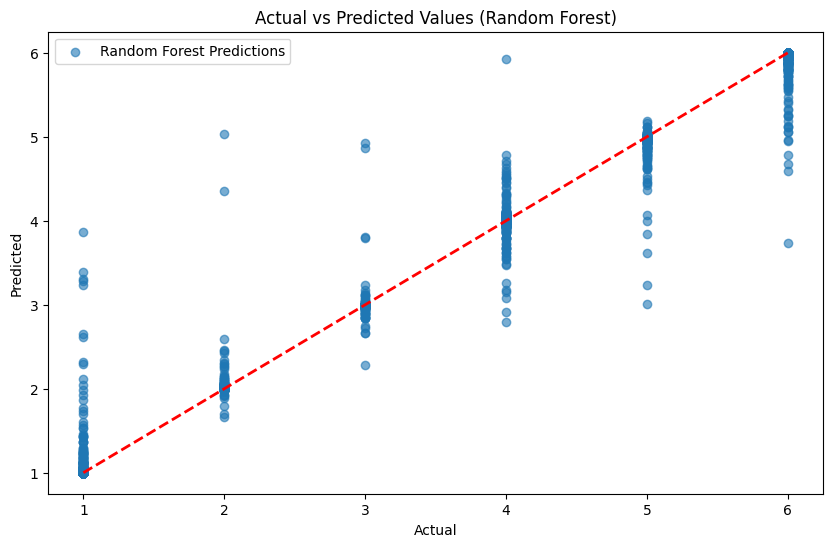

In [22]:
# Collecting all results
results = {
    'Linear Regression': {'CV MSE': -np.mean(cv_results_lr), 'Test MSE': mse_lr},
    'Random Forest': {'CV MSE': -np.mean(cv_results_rf), 'Test MSE': mse_rf},
    'SVR': {'CV MSE': best_mse, 'Test MSE': mse_svr},
    'Neural Networks': {'CV MSE': -np.mean(cv_results_mlp), 'Test MSE': mse_mlp},
    'XGboost': {'CV MSE': -np.mean(cv_results_xgb), 'Test MSE': mse_xgb}
}

# Print results
for model, metrics in results.items():
    print(f"{model}: CV MSE = {metrics['CV MSE']}, Test MSE = {metrics['Test MSE']}")

# Assuming y_pred_rf is your predictions for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()

In [47]:
KNN_score = [0.99820305, 0.99730458, 0.99550764 ,0.99371069, 0.99460916, 0.99460916,
 0.99730458, 0.99730458 ,0.9955036 , 0.99460432]

### 

## 2. DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, random_state=seed)
tree_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(tree_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(tree_scores), np.std(tree_scores)))

[0.98113208 0.9802336  0.97124888 0.95777179 0.96855346 0.9640611
 0.96855346 0.96945193 0.97571942 0.96852518]
Mean: 0.97053, std: 0.00672


In [46]:
DT_score = [0.98113208 ,0.9802336 , 0.97124888 ,0.95777179 ,0.96855346 ,0.9640611,
 0.96855346, 0.96945193, 0.97571942, 0.96852518]

## 3. RandomForestClassifier

In [42]:
forest = RandomForestClassifier(n_estimators=110, random_state=seed)
forest_scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(forest_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(forest_scores), np.std(forest_scores)))

[0.99281222 0.99640611 0.99281222 0.99550764 0.99101527 0.9901168
 0.99460916 0.99730458 0.98741007 0.99190647]
Mean: 0.99299, std: 0.00289


In [45]:
RF_score  =[0.99281222 ,0.99640611, 0.99281222, 0.99550764 ,0.99101527, 0.9901168,0.99460916, 0.99730458, 0.98741007 ,0.99190647]


## 4. MLPClassifier

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(55, 55, 50), activation='tanh', solver='lbfgs', max_iter=2000, random_state=seed)
mlp_scores = cross_val_score(estimator=mlp, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(mlp_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(mlp_scores), np.std(mlp_scores)))

[0.99730458 0.99281222 0.99281222 0.99550764 0.99550764 0.9901168
 0.99371069 0.99550764 0.99460432 0.99190647]
Mean: 0.99398, std: 0.00201


In [44]:
mlp_scores = [0.99730458, 0.99281222, 0.99281222, 0.99550764, 0.99550764, 0.9901168, 0.99371069, 0.99550764, 0.99460432, 0.99190647]


## statistical test check if the samples follow a normal distribution

In [60]:
def normality_test(sample, sample_name):
    stat, p = shapiro(sample)
    alpha = 0.05
    if p > alpha:
        print(sample_name + ': Normal distribution (fail to reject H0)')
    else:
        print(sample_name + ' No normal distribution (reject H0)')

In [61]:
clf_results = [(knn_scores, 'KNN'), (tree_scores, 'DF'), (forest_scores, 'RF'), (mlp_scores, 'MLP')]

for clf_result in clf_results:
    normality_test(clf_result[0], clf_result[1])

KNN: Normal distribution (fail to reject H0)
DF: Normal distribution (fail to reject H0)
RF: Normal distribution (fail to reject H0)
MLP: Normal distribution (fail to reject H0)


### Statistical test to compare all distributions
Given that some samples do not follow the normal distribution, and their sizes (10 for each), the non-parametric Kruskal-Wallis test will be conducted to verify if the samples follow the same distribution

In [52]:
stat, p = kruskal(knn_scores, tree_scores, forest_scores, mlp_scores)
print(stat, p)
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

25.218386914833637 1.3899297618593223e-05
Different distributions (reject H0)



## Pairwise Comparison
The result of the statistical test indicates that the samples do not follow the same distribution. Pairwise tests will be conducted to identify which classifiers have different results based on the statistics, and then select the best one.

In [62]:
def compare_samples(pair):
    sample_names = pair[0][1] + ' x ' + pair[1][1]
    sample_1 = pair[0][0]
    sample_2 = pair[1][0]
    stat, p = mannwhitneyu(sample_1, sample_2)
    alpha = 0.05
    if p > alpha:
        print(sample_names + ': Same distributions (fail to reject H0). p-value: ' + str(p))
    else:
        print(sample_names + ': Different distributions (reject H0). p-value: '+ str(p))

In [64]:
import itertools

for pair in itertools.combinations((clf_results), 2):
    compare_samples(pair)

KNN x DF: Different distributions (reject H0). p-value: 0.00017661101166893502
KNN x RF: Different distributions (reject H0). p-value: 0.036490193433198544
KNN x MLP: Same distributions (fail to reject H0). p-value: 0.07456201278798391
DF x RF: Different distributions (reject H0). p-value: 0.0001806347208075351
DF x MLP: Different distributions (reject H0). p-value: 0.00017661101166893502
RF x MLP: Same distributions (fail to reject H0). p-value: 0.4263100165939262


#### The decision tree was the only classifier that showed a different distribution compared to the others, according to the statistical test.

### Analysis of Distribution of Results

In [65]:
results = pd.DataFrame([knn_scores, tree_scores, forest_scores, mlp_scores])
results.index = ['KNN', 'DT', 'RF', 'MLP']
results

,0,1,2,3,4,5,6,7,8,9
KNN,0.998203,0.997305,0.995508,0.993711,0.994609,0.994609,0.997305,0.997305,0.995504,0.994604
DT,0.981132,0.980234,0.971249,0.957772,0.968553,0.964061,0.968553,0.969452,0.975719,0.968525
RF,0.992812,0.996406,0.992812,0.995508,0.991015,0.990117,0.994609,0.997305,0.987410,0.991906
MLP,0.997305,0.992812,0.992812,0.995508,0.995508,0.990117,0.993711,0.995508,0.994604,0.991906


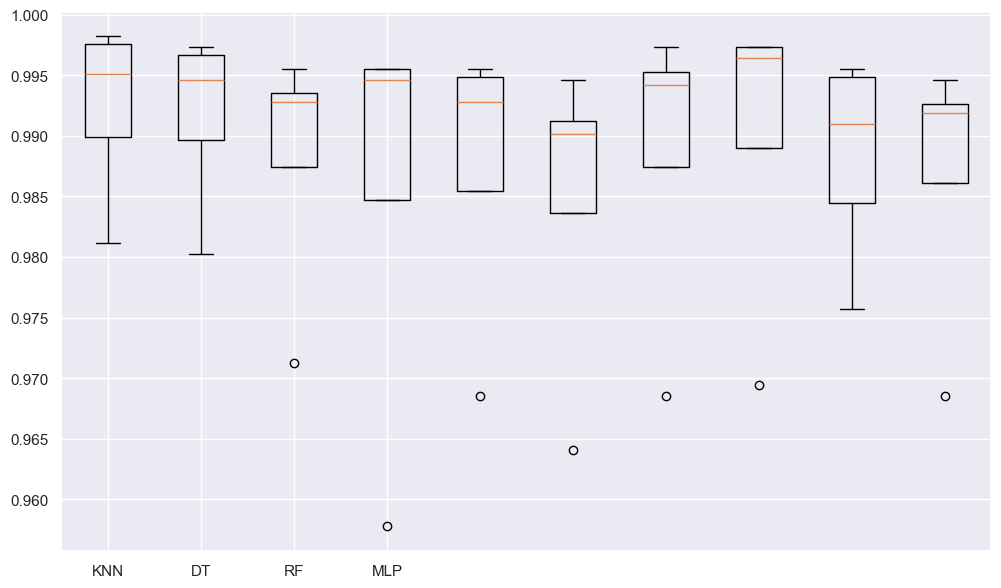

In [66]:
fig, ax = plt.subplots(figsize=(12,7))

ax.boxplot(results)
plt.xticks([1, 2, 3, 4], ['KNN', 'DT', 'RF', 'MLP'])
# plt.savefig('boxplot_results.png')
plt.show()

### Evaluation on the Training Set
After conducting statistical tests and analyzing the results with a box plot, the KNN classifier was selected. This decision was based on it achieving the second highest mean accuracy and being simpler and faster compared to the other classifiers.

Accuracy: 0.99676
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       512
         2.0       1.00      1.00      1.00       605
         3.0       0.99      0.99      0.99       302
         4.0       1.00      1.00      1.00       404
         5.0       0.99      1.00      1.00       593
         6.0       1.00      1.00      1.00       366

    accuracy                           1.00      2782
   macro avg       1.00      1.00      1.00      2782
weighted avg       1.00      1.00      1.00      2782



<Axes: >

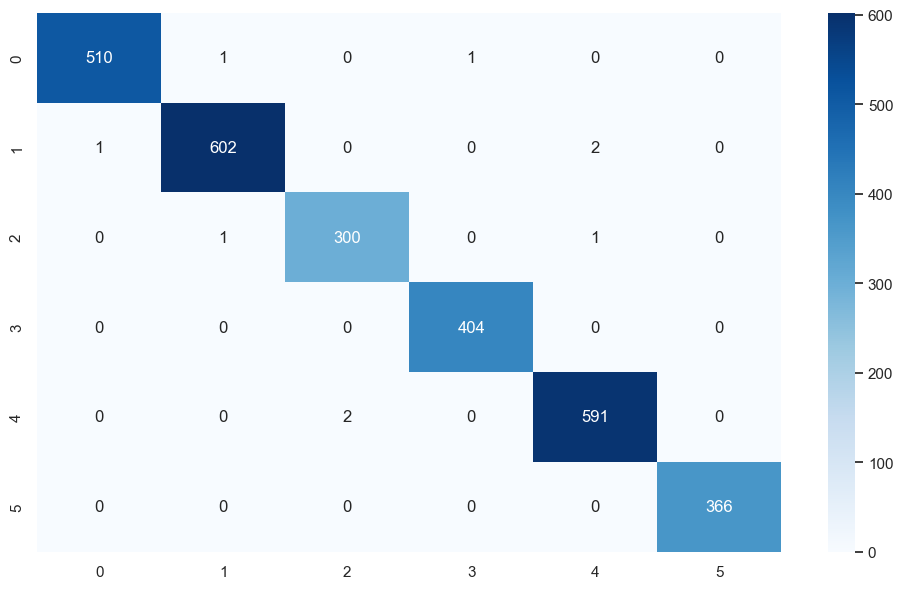

In [67]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print('Accuracy: %.5f' % accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', ax=ax, fmt='d')
# plt.savefig('confusion_matrix_voting.png')